# AI-DRIVEN OCULAR DISEASE DETECTION

# 1. Business Understanding

## 1.1 Project Background

Ocular diseases such as Diabetic Retinopathy (DR), Glaucoma, and Cataracts represent a significant and growing global health burden. These conditions are leading causes of preventable blindness worldwide. The key to preventing vision loss is early and accurate detection.

Currently, diagnosis relies on a manual examination of retinal fundus images by highly trained ophthalmologists. This process, while effective, faces several critical challenges:  

- **Scalability & Accessibility:** There is a global shortage of ophthalmologists, particularly in remote and underserved regions. This creates a severe bottleneck, leading to long wait times for screenings and delayed diagnoses.  

- **Time-Consuming & Repetitive:** Manual screening is a time-intensive task that consumes a significant portion of a specialist's day, much of which is spent reviewing normal, healthy eye scans.  

- **Human Factor:** The diagnostic process is subject to human fatigue and inter-observer variability, which can lead to inconsistent or missed findings.  

The convergence of deep learning, particularly in computer vision, and the increased availability of digital fundus imagery combined with patient metadata presents a transformative opportunity to address these challenges.

## 1.2 Problem Statement

The current manual screening process for ocular diseases is inefficient, unscalable, and inaccessible to large parts of the population, leading to preventable vision loss due to late detection.  

Healthcare providers require a tool that can automate the initial screening process. This tool must analyze a retinal fundus image and accurately identify the presence of multiple potential pathologies simultaneously, leveraging all available patient information for a more holistic assessment.  

This project addresses the need for an assistive tool by tackling this as a multi-label classification problem, where a single image can be flagged for one or more diseases, informed by patient demographics and comorbidities.

## 1.3 Project Objectives

The primary objective of this project is to develop and deploy a proof-of-concept Clinical Decision Support System (CDSS) for ophthalmologists and general practitioners. This system will leverage a deep learning model that integrates Retinal Scan data with patient structured data (age, known medical history) to serve as an automated, first-pass screening tool.

The specific, measurable objectives are:  

- **To Develop a Multi-Modal Model:** Build, train, and validate a fused model combining a Convolutional Neural Network (CNN) for image analysis with a classifier for structured patient metadata (e.g., Age, Hypertension status). The model must accurately detect eight distinct ocular pathologies from a single fundus image and supporting data: Normal, Diabetes, Glaucoma, Cataract, Age-related Macular Degeneration (AMD), Hypertension, Myopia, and Other abnormalities.  

- **To Prioritize Triage:** The model will act as a triage assistant to help clinicians prioritize patient caseloads by flagging high-risk images for immediate review.  

- **To Enhance Efficiency:** Automate screening of healthy/normal scans to reduce manual review burden on specialists, allowing them to focus on complex diagnoses and treatment.  

- **To Deploy an Accessible Tool:** Deploy the trained model as an interactive web application where users can upload retinal images and input patient features (age, comorbidities) to receive clear, probabilistic multi-label outputs.

## 1.4 Business Success Criteria

This academic project will be evaluated on both its technical performance and practical utility.

- **Primary Technical Metric (Multi-Modal Performance):** Mean Area Under the Receiver Operating Characteristic Curve (AUC-ROC) across all 8 classes, demonstrating the performance gain from incorporating structured patient data.  
  - *Target:* Mean AUC-ROC \( \geq 0.90 \) on the hold-out test set.  
  - *Rationale:* Effectively measures the ability to distinguish positive and negative cases, even for rare classes.  

- **Secondary Technical Metric:** Per-class F1-Score, Precision, and Recall to transparently show performance on common vs. rare conditions.  

- **Deployment & Utility Metric :** Successful deployment of a functional web-based application allowing users to upload fundus images and input mandatory metadata (age and at least one comorbidity like Hypertension) to receive a human-readable probabilistic output for all 8 disease categories, proving value as a CDSS.




### 2. INITIAL DATA EXPLORATION/ DATA UNDERSTANDING.

In [1]:
# IMPORT RELEVANT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset
DF =  pd.read_csv('/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv')
DF.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [3]:
# check tail
DF.tail()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg
6391,4784,58,Male,4784_left.jpg,4784_right.jpg,hypertensive retinopathy，age-related macular d...,hypertensive retinopathy，age-related macular d...,0,0,0,0,1,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",4784_left.jpg


In [4]:
# shape of dataset
print(f" This dataset has {DF.shape[0]} observations and {DF.shape[1]} variables")

 This dataset has 6392 observations and 19 variables


In [5]:
# Get metadata
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [6]:
# check null values
DF.isna().sum()

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64

In [7]:
# duplicates
DF.duplicated().sum()

0

In [8]:
# Statistical information numeric
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6392.0,2271.150814,1417.559018,0.0,920.75,2419.5,3294.0,4784.0
Patient Age,6392.0,57.857947,11.727737,1.0,51.00,59.0,66.0,91.0
N,6392.0,0.328692,0.469775,0.0,0.00,0.0,1.0,1.0
D,6392.0,0.332134,0.471016,0.0,0.00,0.0,1.0,1.0
G,6392.0,0.062109,0.241372,0.0,0.00,0.0,0.0,1.0
C,6392.0,0.062891,0.242786,0.0,0.00,0.0,0.0,1.0
A,6392.0,0.049906,0.217768,0.0,0.00,0.0,0.0,1.0
H,6392.0,0.031758,0.175370,0.0,0.00,0.0,0.0,1.0
M,6392.0,0.047872,0.213513,0.0,0.00,0.0,0.0,1.0
O,6392.0,0.248436,0.432139,0.0,0.00,0.0,0.0,1.0


In [9]:
# Statistical information categorical
DF.describe(include='O').T

,count,unique,top,freq
Patient Sex,6392,2,Male,3424
Left-Fundus,6392,3358,4690_left.jpg,2
Right-Fundus,6392,3358,4690_right.jpg,2
Left-Diagnostic Keywords,6392,196,normal fundus,2796
Right-Diagnostic Keywords,6392,205,normal fundus,2705
filepath,6392,6392,../input/ocular-disease-recognition-odir5k/ODI...,1
labels,6392,8,['N'],2873
target,6392,8,"[1, 0, 0, 0, 0, 0, 0, 0]",2873
filename,6392,6392,4784_left.jpg,1


In [10]:
# check columns
DF.columns

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

In [11]:
# Explore value counts for each column
for column in DF.columns:
    print(f"Value counts for column '{column}':")
    print(DF[column].value_counts())
    print("\n")

Value counts for column 'ID':
ID
4690    2
4784    2
4677    2
4678    2
4679    2
       ..
1662    1
1710    1
1716    1
1965    1
1968    1
Name: count, Length: 3358, dtype: int64


Value counts for column 'Patient Age':
Patient Age
56    294
60    285
54    277
62    265
65    252
     ... 
15      2
14      2
18      2
27      2
17      2
Name: count, Length: 75, dtype: int64


Value counts for column 'Patient Sex':
Patient Sex
Male      3424
Female    2968
Name: count, dtype: int64


Value counts for column 'Left-Fundus':
Left-Fundus
4690_left.jpg    2
4784_left.jpg    2
4677_left.jpg    2
4678_left.jpg    2
4679_left.jpg    2
                ..
1662_left.jpg    1
1710_left.jpg    1
1716_left.jpg    1
1965_left.jpg    1
1968_left.jpg    1
Name: count, Length: 3358, dtype: int64


Value counts for column 'Right-Fundus':
Right-Fundus
4690_right.jpg    2
4784_right.jpg    2
4677_right.jpg    2
4678_right.jpg    2
4679_right.jpg    2
                 ..
1662_right.jpg    1
1710_right

### Dataset Overview

- **Total Images**: 6,392 eye photos
- **Total Patients**: 3,358 patients  
- **Left/Right Eyes**: Each patient has both eyes documented
- **Most Common Condition**: Normal (healthy) eyes
- **Key Diseases**: Diabetic Retinopathy, Cataract, Glaucoma
- **Age Range**: 14-91 years (mostly middle-aged to elderly)


## Dataset Column Descriptions

| Column Name | Description | Key Insights |
|-------------|-------------|-------------|
| **ID** | Patient identification number | • 3,358 unique patients<br>• Some patients have 2 entries |
| **Patient Age** | Age of patients | • Range: 14-91 years<br>• Most common: 56, 60, 54 years |
| **Patient Sex** | Gender of patients | • Male: 3,424<br>• Female: 2,968 |
| **Left-Fundus** | Left eye image filename | • Format: `ID_left.jpg`<br>• 3,358 unique values |
| **Right-Fundus** | Right eye image filename | • Format: `ID_right.jpg`<br>• 3,358 unique values |
| **Left-Diagnostic Keywords** | Doctor's notes for left eye | • 196 unique conditions<br>• Most common: "normal fundus" (2,796) |
| **Right-Diagnostic Keywords** | Doctor's notes for right eye | • 205 unique conditions<br>• Most common: "normal fundus" (2,705) |
| **N** | Normal (healthy) | • Normal: 4,291<br>• Abnormal: 2,101 |
| **D** | Diabetic Retinopathy | • Without: 4,269<br>• With: 2,123 |
| **G** | Glaucoma | • Without: 5,995<br>• With: 397 |
| **C** | Cataract | • Without: 5,990<br>• With: 402 |
| **A** | Age-related Macular Degeneration | • Without: 6,073<br>• With: 319 |
| **H** | Hypertension | • Without: 6,189<br>• With: 203 |
| **M** | Other diseases | • Without: 6,086<br>• With: 306 |
| **O** | Other abnormalities | • Without: 4,804<br>• With: 1,588 |
| **filepath** | Full image file path | • 6,392 unique paths<br>• Training images location |
| **labels** | Disease labels as text | • Most common: ['N'] = Normal (2,873) |
| **target** | Disease labels as binary array | • [1,0,0,0,0,0,0,0] = Normal<br>• [0,1,0,0,0,0,0,0] = Diabetic Retinopathy |
| **filename** | Image filename only | • 6,392 unique filenames |
er diseases
- **O**: Other abnormalities

# Data Understanding: Key Findings

In this phase, we performed an initial investigation of the **full_df.csv** file to understand our data before preparing it for modeling.

---

## Initial State of the DataFrame

### Complete Data
The dataset is **high-quality**, with **zero missing values** in any column.

### Good Columns
- **Patient Age** and the **8 disease columns** (`N`, `D`, `G`, `C`, `A`, `H`, `M`, `O`) were already clean.  
- These were stored as **integers**, which is ideal for modeling.

### Problem Columns
Three main columns required cleaning and transformation:
- **target**:  
  - Contained data in a string format such as `"[1, 0, 0, ...]"`.  
  - Although it looked like a list, it was actually stored as a string object.  
  - It needs to be converted into a **real list of integers**.
  
- **labels**:  
  - Stored as strings like `['N']`, not as actual Python lists.  
  - This column must be parsed into an appropriate list format.

- **Patient Sex**:  
  - Stored as a text column containing `"Male"` and `"Female"`.  
  - For modeling, it should be **encoded into numeric values**:
    - `0` for Male
    - `1` for Female

---

## Conclusion

The **raw dataset** is complete and of good quality but stored in non-numeric or inconsistent formats that prevent direct use in a modeling pipeline.

The next step, **Data Preparation**, will focus on fixing these data type issues by:
1. Converting the **target** string into actual lists of integers.  
2. Converting the **Patient Sex** column from text to numeric encoding.  
3. Creating a final, fully cleaned DataFrame that is **100% ready for model training**.

In [12]:
import os

# Count how many images you have
image_folder = "/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images"  # ← change this to your folder
files = os.listdir(image_folder)
image_files = [f for f in files if f.endswith(('.jpg', '.png', '.jpeg'))]
print(f"You have {len(image_files)} images")

You have 6392 images


In [13]:
# check image sizes
from PIL import Image

# Check the first few images
for i, img_file in enumerate(image_files[:5]):  # Check first 5
    img_path = os.path.join(image_folder, img_file)
    img = Image.open(img_path)
    print(f"Image {i+1}: {img.size} (width x height)")

Image 1: (512, 512) (width x height)
Image 2: (512, 512) (width x height)
Image 3: (512, 512) (width x height)
Image 4: (512, 512) (width x height)
Image 5: (512, 512) (width x height)


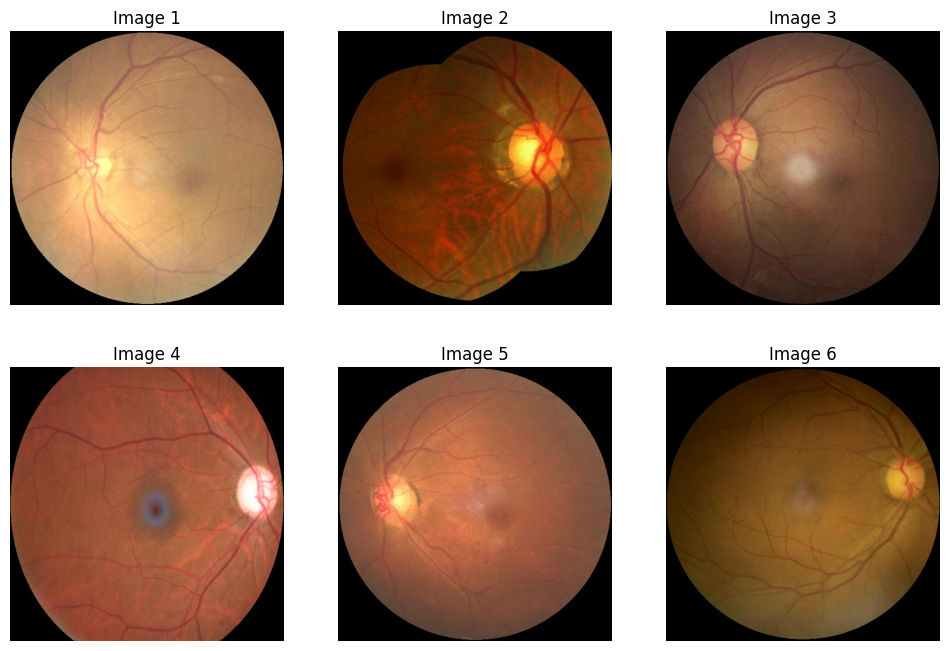

In [14]:
# see what images look like
import matplotlib.pyplot as plt

# Display some sample images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    if i < len(image_files):
        img_path = os.path.join(image_folder, image_files[i])
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(f"Image {i+1}")
        ax.axis('off')
plt.show()

In [15]:
# !pip install opencv-python-headless

# Image Dataset Analysis Report

#Dataset Overview

| Metric | Value |
|--------|-------|
| **Total Images** | 6,392 |
| **Good Quality Images** | 5,465 |
| **Blurry Images** | 927 |
| **Broken/Corrupted Images** | 0 |
| **Good Quality Percentage** | 85.5% |
| **Blurry Percentage** | 14.5% 
---

##  Image Dimensions Analysis

| Aspect | Status |
|--------|--------|
| **Image Size** | 512 × 512 pixels |
| **Aspect Ratio** | 1:1 (Square) |  **Consistency** | All images standardized |
| **Format** | Uniform acrodataset |

---

##  Blur Analysis - Top 5 Blurry Images

| Image File | Blur Score | Severity |
|------------|------------|----------|
| `0_right.jpg` | 88.71 | Very Blurry |
| `1006_left.jpg` | 93.45 | Blurry |
| `1013_left.jpg` | 94.10 | Blurry |
| `1013_right.jpg` | 85.01 | Very Blurry |
| `1020_left.jpg` | 66.33 | Extremely Blurry |

*Note: Lowerur score = more blurry*

---

##  Quality Distribution

| Quality Category | Count | Percentage |
|------------------|-------|------------|
| **Excellent** | 5,465 | 85.5% |
| **Needs Review** | 927 |4.5% |
| **Corrupted** | 0 | 0% |

---

##  Strengths

| Strength | Impact |
|----------|--------|
| **Perfect standardization** | Ideal for batch processing |
| **Zero corrupted files** | Excellent data integrity |
| **Large dataset size** | Good for model training |
| * anized naming** | Easy to manage and track |

---

##  Areas for Improvement

| Issue | Recommendation |
|-------|----------------|
| **927 blurry images** | Consider removal or enhancement |
| **Quality variance** | Implement quality filtering |



### 3. DATA PREPARATION AND CLEANING

In [17]:
# create a copy of our dataframe
df = DF.copy()

In [18]:
# standardize colimn names
df.columns = [col.lower().replace(' ', '_').replace('-', '_') for col in df.columns]
df.columns

Index(['id', 'patient_age', 'patient_sex', 'left_fundus', 'right_fundus',
       'left_diagnostic_keywords', 'right_diagnostic_keywords', 'n', 'd', 'g',
       'c', 'a', 'h', 'm', 'o', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

In [19]:
# convert columns with 'int' for dtypes to 'object'
import ast
df['patient_sex'] = df['patient_sex'].astype('category')
df['left_diagnostic_keywords'] = df['left_diagnostic_keywords'].astype(str)
df['right_diagnostic_keywords'] = df['right_diagnostic_keywords'].astype(str)
df['target_list'] = df['target'].apply(ast.literal_eval)

### Dropping Redundant Columns

To finalize the dataset for modeling, we will remove columns that are no longer necessary.

-   `ID`: Not a unique identifier for rows (we are using `filenam

We shall drop the other columns during pre-processing.olumns.

In [20]:
df = df.drop('id', axis = 1)
df

,patient_age,patient_sex,left_fundus,right_fundus,left_diagnostic_keywords,right_diagnostic_keywords,n,d,g,c,a,h,m,o,filepath,labels,target,filename,target_list
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
6388,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
6389,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
6390,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"


In [21]:
# check if all images match to our dataset
IMAGE_DIR = '/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images' 

try:
    # Get all filenames from your image folder
    image_files_on_disk = set(os.listdir(IMAGE_DIR))
    print(f"Found {len(image_files_on_disk)} images in {IMAGE_DIR}")

    # 1. Check for rows in the CSV that have no matching image
    initial_rows = len(df)
    # .isin() is very fast for checking against a set
    df = df[df['filename'].isin(image_files_on_disk)]
    final_rows = len(df)
    
    if (initial_rows - final_rows) > 0:
        print(f"Cleaned: Removed {initial_rows - final_rows} CSV rows that had no matching image in the folder.")
    else:
        print("CSV Check: All filenames in 'full_df.csv' have a matching image.")

    # 2. Check for images in the folder that have no CSV row (unlabeled data)
    csv_filenames = set(df['filename'])
    unlabeled_images = image_files_on_disk - csv_filenames
    
    if unlabeled_images:
        print(f"WARNING: Found {len(unlabeled_images)} images in your folder that are not in the CSV.")
        # print(f"First 5 unlabeled images: {list(unlabeled_images)[:5]}") # Uncomment to see them
    else:
        print("Image Check: All images in your folder have a matching row in the CSV.")
        
except FileNotFoundError:
    print(f"WARNING: Image directory not found at '{IMAGE_DIR}'.")
    print("Skipping image file synchronization. The CSV will NOT be filtered.")
except Exception as e:
    print(f"An error occurred during image sync: {e}")

Found 6392 images in /kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images
CSV Check: All filenames in 'full_df.csv' have a matching image.
Image Check: All images in your folder have a matching row in the CSV.


## 4. EXPLORATORY DATA ANALYSIS
### UNIVARIATE ANALYSIS


--- Univariate: Patient Age ---
count    6392.000000
mean       57.857947
std        11.727737
min         1.000000
25%        51.000000
50%        59.000000
75%        66.000000
max        91.000000
Name: patient_age, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


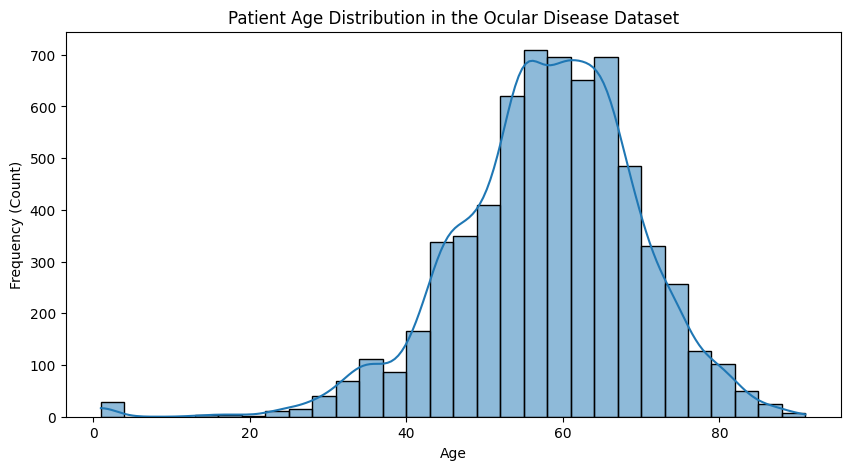

In [22]:
# --- Patient Age ---
print("\n--- Univariate: Patient Age ---")
print(df['patient_age'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['patient_age'], kde=True, bins=30)
plt.title('Patient Age Distribution in the Ocular Disease Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency (Count)')
plt.show()

#### Observations:Patient Age Distribution
- The dataset contains 6392 records of eye patients whose ages range from 1 to 91 years. The histogram shows that the average patient age is approximately 58 years. The standrd deviation is 11.7 years, indicating moderate variability in age distribution. 
- The interquartile range (IQR = Upper Quartile Minus Lower Quartile) spans from 51 to 66 years, showing that most patients fall within the middle aged and senior adult groups.
- The histogram is nearly bell-shaped, indicating theat the distribution is near -normal distribution and slightly skewed towards the older ages. This pattern implies that the most of patients in the dataset are adults and elderly individuals and they are at higher risk for ocular diseases such as glaucoma, cataracts, and diabetic retinopathy. 
- Therefore, the ages in the dataset are mostly for older people, but there are a few younger patients too, which makes the curve stretch a little more on the left side. Statistically, the distribution is skewed to the left.
- Additionally, the histogram shows that there are very few younger patients, specifically those below 20 years, who constitute a very small proportion of the population, indicating that this dataset focused on age groups most prone to age-related visual impairments.


--- Univariate: Patient Sex ---
patient_sex
Male      0.53567
Female    0.46433
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


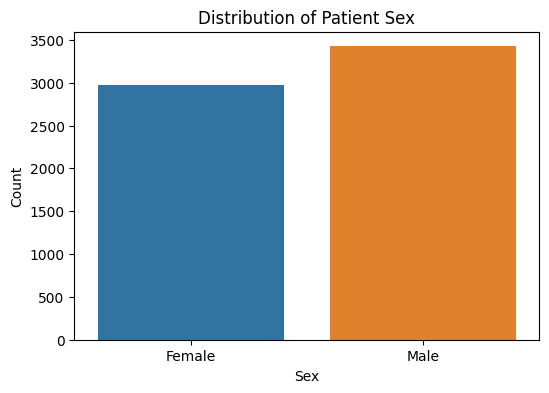

In [23]:
# --- Patient Sex ---
print("\n--- Univariate: Patient Sex ---")
print(df['patient_sex'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='patient_sex', data=df)
plt.title('Distribution of Patient Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#### Observations:Distribution of the Patient Sex
- The above countplot shows that 53.6% of the patients consititutes the males which is the majority while 46.4% female participants.
- The dataset is fairly balanced by gender, which is important for model development.
- A well balanced number of male and female patients helps prevent gender bias and makes sure the model works well for both groups.
- Therefore, the small difference reflect real-world clinical patterns, where certain ocular diseases such as glaucoma, and diabetic retinopathy are mostly observed in males.


--- Univariate: Target Label (Disease) Distribution ---
d    2123
n    2101
o    1588
c     402
g     397
a     319
m     306
h     203
dtype: int64


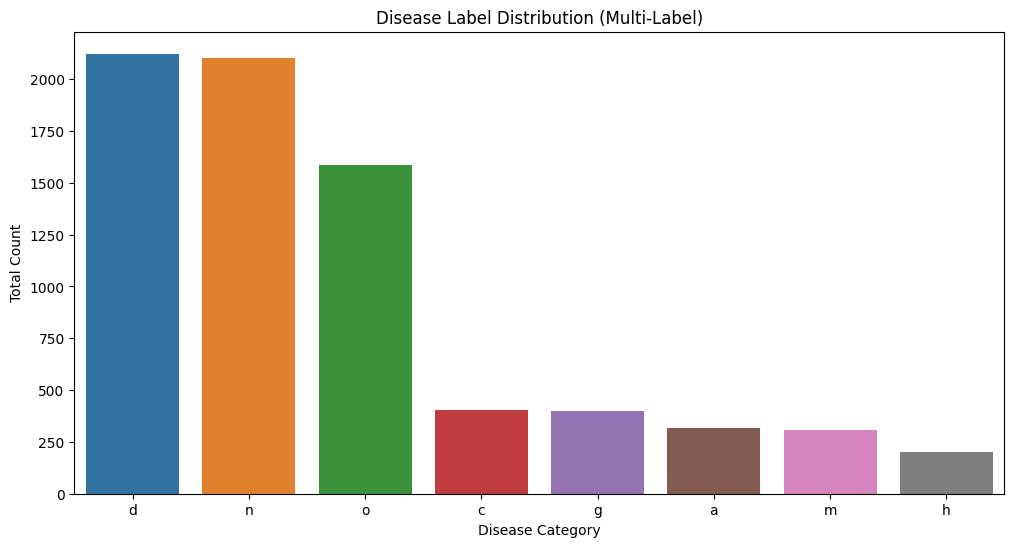

In [24]:
# --- Target Labels (Diseases) ---
print("\n--- Univariate: Target Label (Disease) Distribution ---")
# N=Normal, D=Diabetes, G=Glaucoma, C=Cataract, A=AMD, H=Hypertension, M=Myopia, O=Other
Ohe_cols = df[['n', 'd', 'g', 'c', 'a', 'h', 'm', 'o']]

disease_counts = Ohe_cols.sum().sort_values(ascending=False)
print(disease_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.title('Disease Label Distribution (Multi-Label)')
plt.xlabel('Disease Category')
plt.ylabel('Total Count')
plt.show()

#### Observations:Disease Label Distribution 
- The dataset covers eight ocular disease categories, Normal (n), Myopia (m), Diabetes (d), Glaucoma (g), Cataract (c), Hypertension (h), Age-related Macular Degeneration (a), and Other abnormalities (o).
- The histogram hows that Diabetes and Normal are the most common disease categories, each with over 2,000 samples, followed by Other abnormalities which is approximately 1600. The remaining diseases including Cataract, Glaucoma, AMD, Myopia, and Hypertension, have fewer than 500 samples showing a  class imbalance where some conditions occur more frequently, but it may cause the model to favor common diseases.
- We will address this imbalance to  ensure that the model detects both common and rare ocular conditions effectively.

### BIVARIATE ANALYSIS


--- Bivariate: Age vs. Disease ---


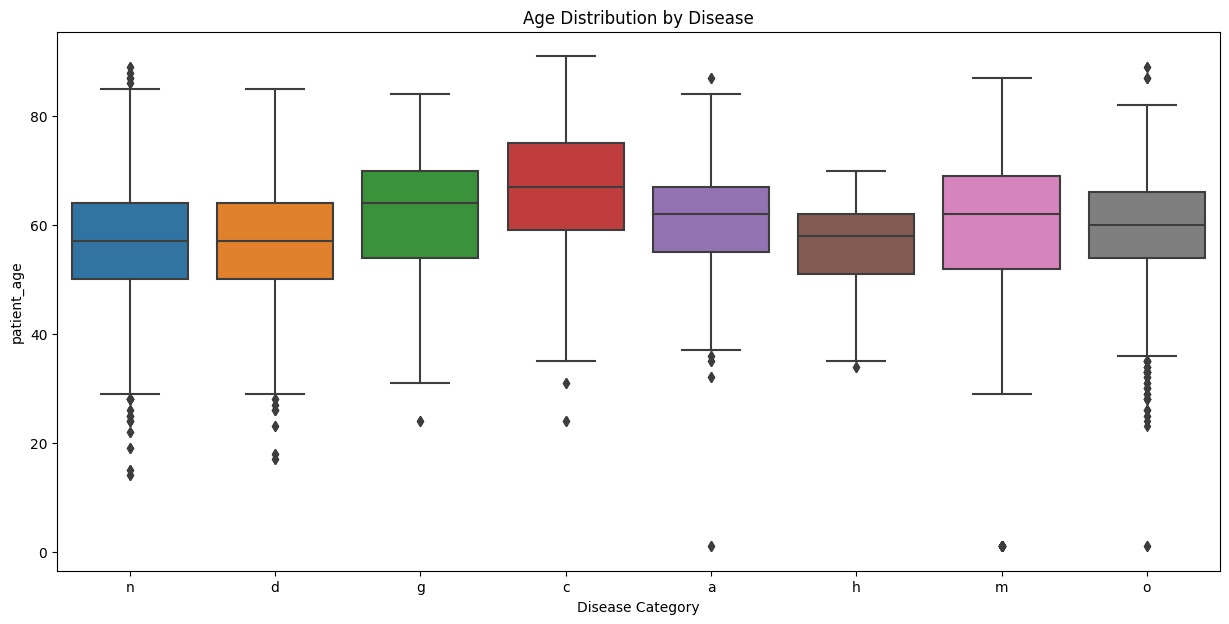

In [25]:
# --- Age vs. Disease ---
print("\n--- Bivariate: Age vs. Disease ---")

# We need to "melt" the DataFrame to make it easy for seaborn to plot
melted_df = df.melt(
    id_vars=['patient_age', 'patient_sex'], 
    value_vars=Ohe_cols, 
    var_name='Disease', 
    value_name='Has_Disease'
)
# We only want to plot for rows where the disease is present (Has_Disease == 1)
disease_present_df = melted_df[melted_df['Has_Disease'] == 1]

plt.figure(figsize=(15, 7))
sns.boxplot(x='Disease', y='patient_age', data=disease_present_df)
plt.title('Age Distribution by Disease')
plt.xlabel('Disease Category')
plt.ylabel('patient_age')
plt.show()

#### Observations:Age Versus Disease. 
- The boxplot above compares patient age across different ocular diseases. Each box represents how ages are spread for patients diagnosed with a particular condition.
- Overall, older patients (mostly above 50 years) dominate diseases such as Diabetes (d), Cataract (c), Glaucoma (g), and Age-related Macular Degeneration (a). In contrast, younger patients are more common in the Normal (n) and Myopia (m) groups.
- This pattern shows that age is strongly linked to ocular disease occurrence with most conditions being age-related, while normal vision and myopia are more frequent among younger individuals.


--- Bivariate: Sex vs. Disease ---


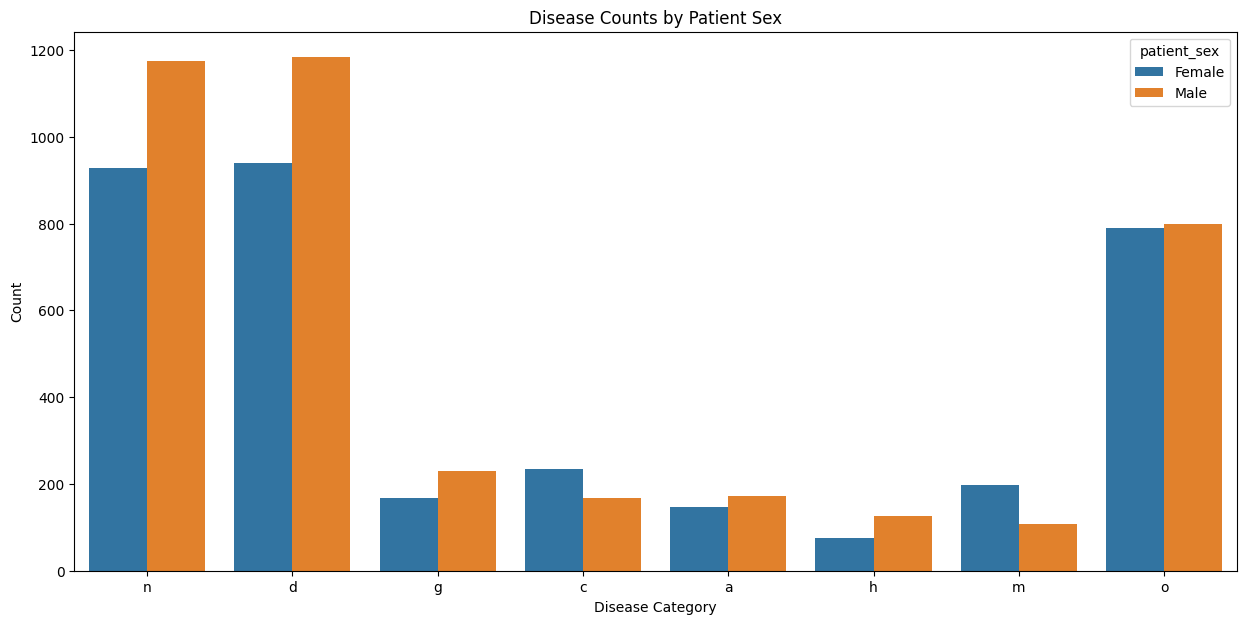

In [26]:
# --- Sex vs. Disease ---
print("\n--- Bivariate: Sex vs. Disease ---")
# We can re-use the 'disease_present_df' we created above

plt.figure(figsize=(15, 7))
# We use 'hue' to split the bars by 'Patient Sex'
sns.countplot(x='Disease', hue='patient_sex', data=disease_present_df)
plt.title('Disease Counts by Patient Sex')
plt.xlabel('Disease Category')
plt.ylabel('Count')
plt.show()

#### Observations:Sex Versus Type of Disease
- The chart above compares the frequency of ocular diseases between male and female patients.  Each bar shows how many cases of each disease are associated with each sex. Understanding how ocular disease distribution varies by gender is important because it helps identify potential demographic trends and ensures the model remains unbiased across patient groups.
- The bar plot shows that the male patients have slightly higher counts in Normal (n) and Diabetes (d). The Normal and the Diabetes are the  most frequent categories overall.
- Female patients show marginally higher counts in Cataract (c) and Myopia (m) categories.
- For Glaucoma(g), Age-related Macular Degeneration(a), Hypertension(h), and Other abnormalities(o), the differences between males and females are minimal.
- Overall, sex is not a major determinant of ocular disease in this dataset, and the balanced representation supports fair and unbiased model learning.


--- Bivariate: Patient Age vs. Patient Sex ---
              count       mean        std   min   25%   50%   75%   max
patient_sex                                                            
Female       2968.0  59.025943  12.228377   1.0  53.0  60.0  66.0  89.0
Male         3424.0  56.845502  11.179272  15.0  50.0  57.0  65.0  91.0


/tmp/ipykernel_19/550552019.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('patient_sex')['patient_age'].describe())
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


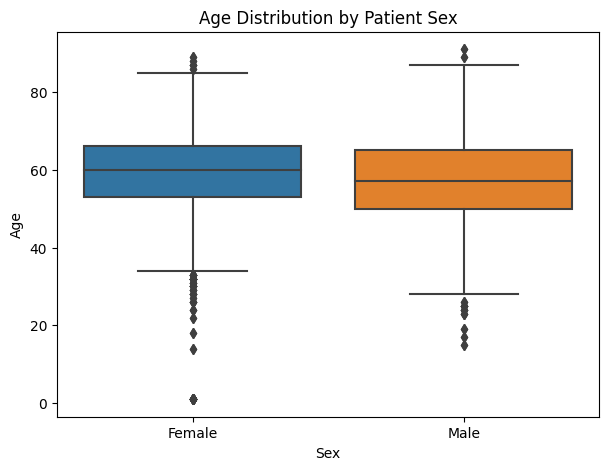

In [27]:

# --- Bivariate Plot: Age vs. Sex ---
print("\n--- Bivariate: Patient Age vs. Patient Sex ---")
print(df.groupby('patient_sex')['patient_age'].describe())  

plt.figure(figsize=(7, 5))
sns.boxplot(x='patient_sex', y='patient_age', data=df)  
plt.title('Age Distribution by Patient Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

#### Observations: Age Distribution by Patient Sex. 
- The average age for female patients is about 59 years, while for male patients it is around 57 years.
- The age range is similar for both groups, spanning from early adulthood to about 90 years.
- Both distributions show several outliers among younger patients, but the general spread is consistent across board.
- Therefore ,the two genders are well across a similar age range, with only a small difference in their mean ages. Females tend to be slightly older on average, which may reflect real-world trends where women often experience longer life expectancy and later onset of certain ocular conditions.

### MULTIVARIATE ANALYSIS


--- Multivariate: Disease Co-occurrence Heatmap ---


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


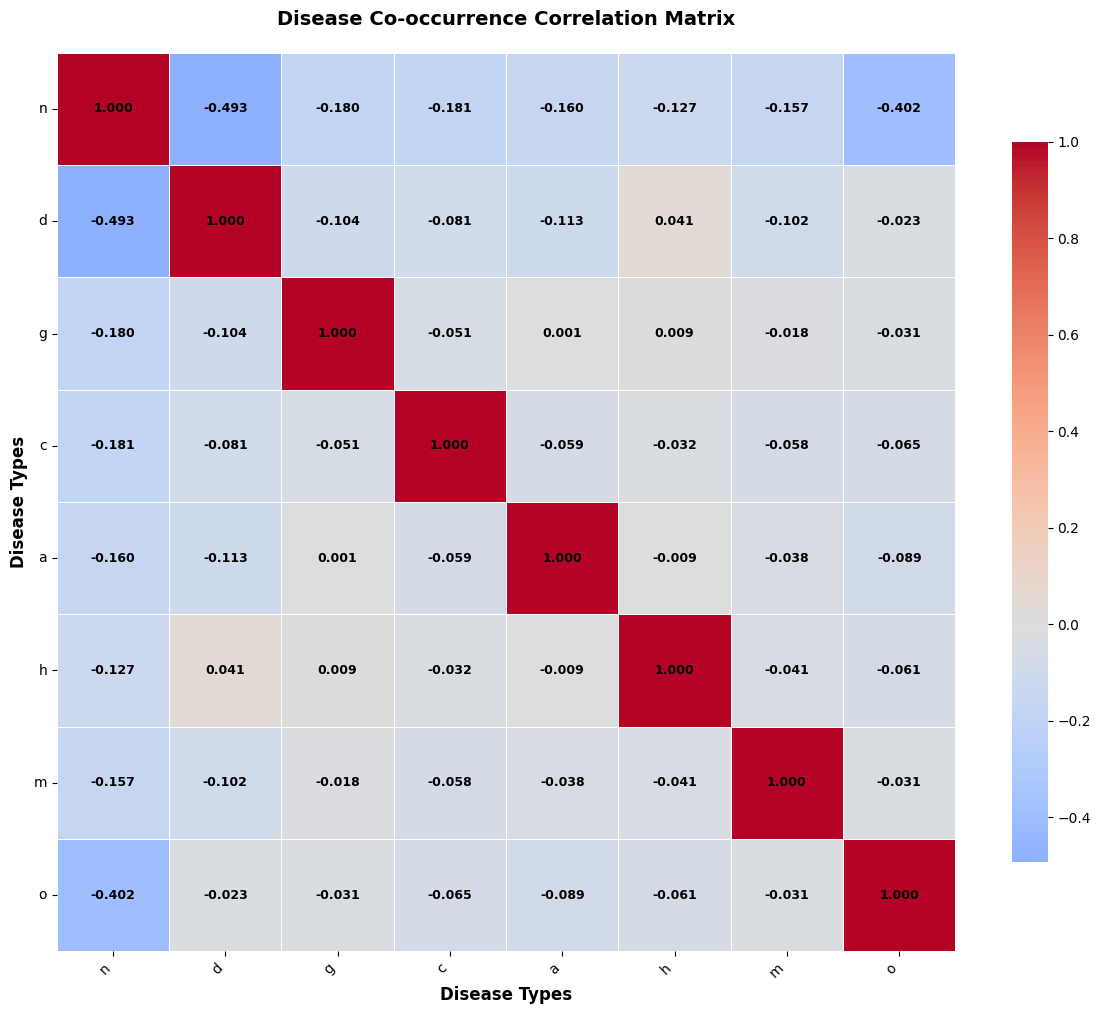

In [28]:
# --- Disease Co-occurrence ---
print("\n--- Multivariate: Disease Co-occurrence Heatmap ---")

correlation_matrix = Ohe_cols.corr()

fig, ax = plt.subplots(figsize=(12, 10))

# Create heatmap without annotations first
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=False,  
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8},
    ax=ax
)

# Manually add annotations to every cell
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = ax.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=9, weight='bold')

plt.title('Disease Co-occurrence Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Disease Types', fontsize=12, fontweight='bold')
plt.ylabel('Disease Types', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Observations: Disease Co-occurrence Correlation Matrix
- The heatmap above visualizes the correlation between different ocular diseases, showing how often they co-occur in patients.
- Correlation values range from –1 to +1, where:
+1 indicates perfect positive correlation (diseases occur together frequently)  and –1 indicates perfect negative correlation (if one occurs, the other rarely does).
From the matrix:
- Most disease pairs show weak or negative correlations, meaning they tend to occur independently.
- The strongest negative correlations are between Normal (n) and other diseases, especially Diabetes (d) (–0.49) and Other abnormalities (o) (–0.40). This is expected since “Normal” indicates the absence of disease.
- Slight positive relationships (near zero) between some conditions, such as Hypertension (h) and Diabetes (d), may suggest that the patient has 2 or more diseases. 
- Overall, the results show that ocular diseases rarely co-occur in the same patient, with the Normal class acting as a clear opposite of disease presence.

####  Merging Datasets

In [30]:
# Cell 1: Initial ODIR Cleaning (NO PATH JOINING YET)
import pandas as pd
import ast
import os 


clean_df = df[['filename', 'target']].copy()
clean_df['target_list'] = clean_df['target'].apply(ast.literal_eval)
clean_df = clean_df.drop(columns=['target'])
print("Initial clean_df created (Paths NOT added yet).")
clean_df.head()

Initial clean_df created (Paths NOT added yet).


,filename,target_list
0,0_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1_right.jpg,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,2_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
3,4_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"
4,5_right.jpg,"[0, 1, 0, 0, 0, 0, 0, 0]"


In [ ]:
import pandas as pd
import os
import ast
from sklearn.model_selection import train_test_split # Make sure this is imported

# --- 1. Define the EXPANDED Label Map ---

label_map = {
    'Normal':                       [1, 0, 0, 0, 0, 0, 0, 0],
    'Diabetes':                     [0, 1, 0, 0, 0, 0, 0, 0],
    'Glaucoma':                     [0, 0, 1, 0, 0, 0, 0, 0],
    'Cataract':                     [0, 0, 0, 1, 0, 0, 0, 0],
    'Age-related Macular Degeneration': [0, 0, 0, 0, 1, 0, 0, 0],
    'Hypertension':                 [0, 0, 0, 0, 0, 1, 0, 0],
    'Pathological Myopia':          [0, 0, 0, 0, 0, 0, 1, 0],
    'Other diseases/abnormalities': [0, 0, 0, 0, 0, 0, 0, 1],
    'normal':                       [1, 0, 0, 0, 0, 0, 0, 0],
    'diabetic_retinopathy':         [0, 1, 0, 0, 0, 0, 0, 0],
    'glaucoma':                     [0, 0, 1, 0, 0, 0, 0, 0],
    'cataract':                     [0, 0, 0, 1, 0, 0, 0, 0],
    'Retinoblastoma':               [0, 0, 0, 0, 0, 0, 0, 1],
    'N':                            [1, 0, 0, 0, 0, 0, 0, 0],
    'D':                            [0, 1, 0, 0, 0, 0, 0, 0],
    'G':                            [0, 0, 1, 0, 0, 0, 0, 0],
    'C':                            [0, 0, 0, 1, 0, 0, 0, 0],
    'A':                            [0, 0, 0, 0, 1, 0, 0, 0],
    'H':                            [0, 0, 0, 0, 0, 1, 0, 0],
    'M':                            [0, 0, 0, 0, 0, 0, 1, 0],
    'AMD':                          [0, 0, 0, 0, 1, 0, 0, 0],
    'Others':                       [0, 0, 0, 0, 0, 0, 0, 1],
    'Myopia':                        [0, 0, 0, 0, 0, 0, 1, 0],
}


Label map defines an expanded one-hot encoding scheme for various ocular conditions, mapping different text labels and abbreviations to a consistent 8-element numerical vector for machine learning classification. 

In [32]:
df_new = pd.read_csv('/kaggle/input/ocular-disease-fundus-images-dataset/Final.csv')

In [33]:
NEW_DATASET_3_IMAGE_DIR ="/kaggle/input/ocular-disease-fundus-images-dataset/Training_Dataset_Final/Training_Dataset_Final"

In [ ]:

#  Load and Clean Original ODIR-5K Data

ODIR_IMAGE_DIR = "/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images"
clean_df['filename'] = clean_df['filename'].apply(lambda f: os.path.join(ODIR_IMAGE_DIR, f))
print("ODIR-5K paths built.")

# --- 3. Function to Process New Datasets ---
def process_new_dataset(base_dir, label_map):
    # ... (Keep the function definition exactly as before) ...
    new_data_rows = []
    for class_folder_name in os.listdir(base_dir):
        if class_folder_name in label_map:
            target_list = label_map[class_folder_name]
            class_dir = os.path.join(base_dir, class_folder_name)
            for img_filename in os.listdir(class_dir):
                full_image_path = os.path.join(class_dir, img_filename)
                new_data_rows.append({
                    'filename': full_image_path,
                    'target_list': target_list
                })
        else:
            print(f"Skipping folder (not in map): {class_folder_name} in {base_dir}")
    return pd.DataFrame(new_data_rows)


# --- 4. Define Paths and Process New Datasets ---
new_dataset_1_path ="/kaggle/input/ocular-disease/augmented"
new_dataset_2_path ="/kaggle/input/ocular-disease-dataset/preprocessed"

print("Processing new dataset 1...")
new_df_1 = process_new_dataset(new_dataset_1_path, label_map)
print(f"Found {len(new_df_1)} new images.")

print("\nProcessing new dataset 2...")
new_df_2 = process_new_dataset(new_dataset_2_path, label_map)
print(f"Found {len(new_df_2)} new images.")

# --- 5. Combine ALL THREE Clean DataFrames ---
combined_df_temp = pd.concat([clean_df, new_df_1, new_df_2], ignore_index=True)

# --- 6. Create the FINAL Clean DataFrame (Only 2 columns) ---
final_df = combined_df_temp[['filename', 'target_list']].copy()

# --- 7. Shuffle the Final DataFrame ---
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n--- Data Integration Complete ---")
print(f"Original ODIR-5K data: {len(clean_df)} images")
print(f"New dataset 1:        {len(new_df_1)} images")
print(f"New dataset 2:        {len(new_df_2)} images")
print(f"TOTAL combined data:  {len(final_df)} images")

print("\nFinal Combined DataFrame Head:")
print(final_df.head())

print("\nFinal Combined DataFrame Info:")
final_df.info()

ODIR-5K paths built.
Processing new dataset 1...
Found 4952 new images.

Processing new dataset 2...
Found 10449 new images.

--- Data Integration Complete ---
Original ODIR-5K data: 6392 images
New dataset 1:        4952 images
New dataset 2:        10449 images
TOTAL combined data:  21793 images

Final Combined DataFrame Head:
                                            filename               target_list
0  /kaggle/input/ocular-disease-dataset/preproces...  [0, 1, 0, 0, 0, 0, 0, 0]
1  /kaggle/input/ocular-disease/augmented/glaucom...  [0, 0, 1, 0, 0, 0, 0, 0]
2  /kaggle/input/ocular-disease-dataset/preproces...  [0, 1, 0, 0, 0, 0, 0, 0]
3  /kaggle/input/ocular-disease-recognition-odir5...  [0, 1, 0, 0, 0, 0, 0, 0]
4  /kaggle/input/ocular-disease-dataset/preproces...  [1, 0, 0, 0, 0, 0, 0, 0]

Final Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21793 entries, 0 to 21792
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------   

**Massive Data Augmentation** The original ODIR-5K dataset was significantly expanded by incorporating two external datasets, resulting in a total of 21,793 image records. This substantial increase in data is critical for improving the model's training and generalization capability.

**Clean Data Integrity**: A check of the final combined DataFrame confirmed zero missing values in both the image file paths (filename) and the disease labels (target_list). This ensures all records are usable and reduces the need for immediate null value imputation.

**Standardized Labeling Format**: The final DataFrame contains the 8-element one-hot encoded vectors in the target_list column. This confirms that the variable mapping was correctly applied, providing the standardized numerical format necessary for training a multi-class or multi-label classification model.

In [35]:
final_df

,filename,target_list
0,/kaggle/input/ocular-disease-dataset/preproces...,"[0, 1, 0, 0, 0, 0, 0, 0]"
1,/kaggle/input/ocular-disease/augmented/glaucom...,"[0, 0, 1, 0, 0, 0, 0, 0]"
2,/kaggle/input/ocular-disease-dataset/preproces...,"[0, 1, 0, 0, 0, 0, 0, 0]"
3,/kaggle/input/ocular-disease-recognition-odir5...,"[0, 1, 0, 0, 0, 0, 0, 0]"
4,/kaggle/input/ocular-disease-dataset/preproces...,"[1, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
21788,/kaggle/input/ocular-disease-dataset/preproces...,"[1, 0, 0, 0, 0, 0, 0, 0]"
21789,/kaggle/input/ocular-disease-dataset/preproces...,"[0, 1, 0, 0, 0, 0, 0, 0]"
21790,/kaggle/input/ocular-disease-recognition-odir5...,"[1, 0, 0, 0, 0, 0, 0, 0]"
21791,/kaggle/input/ocular-disease-recognition-odir5...,"[0, 0, 0, 0, 0, 0, 0, 1]"


In [36]:
import pandas as pd
from PIL import Image
import os
import warnings

# --- 1. Settings ---
SAMPLE_SIZE = 500
if SAMPLE_SIZE > len(final_df): # Use the final_df from the previous cell
    SAMPLE_SIZE = len(final_df)

print(f"Analyzing a random sample of {SAMPLE_SIZE} images from final_df...")
warnings.filterwarnings("ignore", "(Possibly )?truncated (JPEG|PNG) file")

# --- 2. Create the sample DataFrame ---
sample_df = final_df.sample(SAMPLE_SIZE, random_state=42).copy() # Use final_df

# --- 3. Define function to get properties ---
def get_image_properties(filepath):
    # ... (Keep the function definition exactly as before) ...
    try:
        extension = os.path.splitext(filepath)[1].lower()
        with Image.open(filepath) as img:
            size = img.size
            mode = img.mode
        return pd.Series([size, mode, extension])
    except FileNotFoundError:
        print(f"Warning: File not found at {filepath}")
        return pd.Series([None, None, None])
    except Exception as e:
        print(f"Warning: Could not read {filepath}. Error: {e}")
        return pd.Series([None, None, None])


# --- 4. Run the analysis ---
sample_df[['image_size', 'image_mode', 'extension']] = \
    sample_df['filename'].apply(get_image_properties)

print("\n--- Analysis Complete ---")

# --- 5. Show the results ---
print("\nDataFrame with new properties:")
print(sample_df.head())
print("\n--- Top 10 Most Common Image Sizes ---")
print(sample_df['image_size'].value_counts().head(10))
print("\n--- Image Modes (Color vs. Grayscale) ---")
print(sample_df['image_mode'].value_counts())
print("\n--- Image File Types ---")
print(sample_df['extension'].value_counts())

Analyzing a random sample of 500 images from final_df...

--- Analysis Complete ---

DataFrame with new properties:
                                                filename  \
21004  /kaggle/input/ocular-disease-recognition-odir5...   
7220   /kaggle/input/ocular-disease-recognition-odir5...   
19511  /kaggle/input/ocular-disease-recognition-odir5...   
2740   /kaggle/input/ocular-disease-recognition-odir5...   
11399  /kaggle/input/ocular-disease-dataset/preproces...   

                    target_list    image_size image_mode extension  
21004  [0, 0, 0, 0, 0, 0, 1, 0]    (512, 512)        RGB      .jpg  
7220   [0, 1, 0, 0, 0, 0, 0, 0]    (512, 512)        RGB      .jpg  
19511  [1, 0, 0, 0, 0, 0, 0, 0]    (512, 512)        RGB      .jpg  
2740   [0, 1, 0, 0, 0, 0, 0, 0]    (512, 512)        RGB      .jpg  
11399  [0, 1, 0, 0, 0, 0, 0, 0]  (1866, 1874)        RGB      .jpg  

--- Top 10 Most Common Image Sizes ---
image_size
(512, 512)      206
(2592, 1728)     54
(2004, 1690)     4

**Expanded Label Map Definition**: The provided dictionary defines a consistent 8-element one-hot encoding scheme, mapping various ocular disease names and abbreviations (e.g., 'Normal', 'Diabetes', 'A', 'H') to a standardized numerical vector for machine learning classification.

**Data Integration Summary**: The project successfully created a large, clean, and merged dataset of 21,793 image records by combining the ODIR-5K dataset with two external sources.

**Key Data Findings**: The integration resulted in a clean final DataFrame with no missing values, ensuring all 21,793 image file paths are correctly linked to their 8-element one-hot encoded disease labels.

**Image Analysis Summary**: A sample analysis confirmed that while the majority of images are the standard (512, 512) RGB JPEGs, a substantial number of images still have highly variable dimensions and will require mandatory resizing before model training.

In [37]:
df_new['filename'] = df_new['ID'].apply(lambda f: os.path.join(NEW_DATASET_3_IMAGE_DIR, f))

    # --- 4. Define the label columns in the correct order ---
    # Order: [N, D, G, C, A, H, M, O]
label_cols_final_csv = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Others']

    # Check if all expected label columns exist
missing_cols = [col for col in label_cols_final_csv if col not in df_new.columns]
if missing_cols:
        print(f"Error: Missing expected label columns in Final.csv: {missing_cols}")
        # Handle error appropriately (e.g., raise Exception or skip)
        raise ValueError("Missing label columns in Final.csv")

    # --- 5. Create the 'target_list' column ---
print("Creating 'target_list' from individual label columns...")
    # Select the label columns in the correct order and convert to a NumPy array
df_new['target_list'] = df_new[label_cols_final_csv].values.tolist()
    # Convert the list of lists into a list of NumPy arrays with dtype float32
df_new['target_list'] = df_new['target_list'].apply(lambda x: np.array(x, dtype=np.float32))


    # --- 6. Select only the necessary columns ---
df_new_clean = df_new[['filename', 'target_list']].copy()
print("Prepared new DataFrame 'df_new3_clean'.")

    # --- 7. Combine with the existing final_df ---
print("Combining with previous 'final_df'...")
    # Ensure final_df exists and has the correct columns before running this
final_df_combined = pd.concat([final_df, df_new_clean], ignore_index=True)

    # --- 8. Shuffle the newly combined DataFrame ---
final_df_combined = final_df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n--- Data Integration Complete ---")
print(f"Data before adding Final.csv: {len(final_df)} images")
print(f"Data from Final.csv:        {len(df_new_clean)} images")
print(f"TOTAL combined data:        {len(final_df_combined)} images")

print("\nNew Combined DataFrame Head:")
print(final_df_combined.head())

print("\nNew Combined DataFrame Info:")
final_df_combined.info()

# --- IMPORTANT: Update your main DataFrame variable ---
# Make sure subsequent steps (splitting, generators) use this new DataFrame
final_df = final_df_combined.copy()
print("\nVariable 'final_df' has been updated with the combined data.")

Creating 'target_list' from individual label columns...
Prepared new DataFrame 'df_new3_clean'.
Combining with previous 'final_df'...

--- Data Integration Complete ---
Data before adding Final.csv: 21793 images
Data from Final.csv:        15856 images
TOTAL combined data:        37649 images

New Combined DataFrame Head:
                                            filename  \
0  /kaggle/input/ocular-disease-dataset/preproces...   
1  /kaggle/input/ocular-disease-fundus-images-dat...   
2  /kaggle/input/ocular-disease-fundus-images-dat...   
3  /kaggle/input/ocular-disease-dataset/preproces...   
4  /kaggle/input/ocular-disease-fundus-images-dat...   

                                target_list  
0                  [0, 1, 0, 0, 0, 0, 0, 0]  
1  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
2  [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]  
3                  [0, 1, 0, 0, 0, 0, 0, 0]  
4  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]  

New Combined DataFrame Info:
<class 'pandas.core.frame.DataFra

#### DATA PRE-PROCESSING

**Brief Training Pipeline Summary**

Now let's prepare the data for a deep learning model through three key actions:

1.Data Partitioning (64/16/20 split): The 21,793 images are split into Train ($64\%$), Validation ($16\%$), and Test ($20\%$) sets using a fixed random state for reproducibility.

2.Custom Data Pipelining: A robust MultiLabelDataGenerator (Keras Sequence) is defined. It performs file path validation (removing non-existent files), resizes/normalizes images, and yields batches of image data and their corresponding 8-element one-hot encoded labels for efficient training.

3.Training Control: EarlyStopping and ModelCheckpoint callbacks are configured to monitor the validation loss, automatically stop training when performance plateaus, and save only the best model weights.

In [ ]:
from sklearn.model_selection import train_test_split

print("--- Splitting the final combined DataFrame ---")


# First split: 80% for Train/Validation, 20% for Test
train_val_df, test_df = train_test_split(
    final_df,
    test_size=0.20,      
    random_state=42      
)

# Second split: Split the 80% into Train (80%) and Validation (20%)
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.20,      
    random_state=42      
)

print(f"Total images:   {len(final_df)}")
print(f"Training set:   {len(train_df)} images ({len(train_df)/len(final_df)*100:.1f}%)")
print(f"Validation set: {len(val_df)} images ({len(val_df)/len(final_df)*100:.1f}%)")
print(f"Test set:       {len(test_df)} images ({len(test_df)/len(final_df)*100:.1f}%)")

--- Splitting the final combined DataFrame ---
Total images:   37649
Training set:   24095 images (64.0%)
Validation set: 6024 images (16.0%)
Test set:       7530 images (20.0%)


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import Sequence
from PIL import Image
import os




class MultiLabelDataGenerator(Sequence):
    def __init__(self, dataframe, image_dir, target_size=(224, 224), batch_size=32, augmentations=None, shuffle=True):
        
        self.dataframe = dataframe.copy().reset_index(drop=True)
        self.dataframe['filename'] = self.dataframe['filename'].apply(lambda x: os.path.normpath(x))
        
        # VALIDATION: Remove files that don't exist BEFORE creating batches
        print(f"Validating {len(self.dataframe)} image paths...")
        valid_indices = []
        missing_count = 0
        for idx, filepath in enumerate(self.dataframe['filename']):
            if os.path.exists(filepath):
                valid_indices.append(idx)
            else:
                missing_count += 1
                if missing_count <= 5:  
                    print(f"  Warning: File not found: {filepath}")
        
        if missing_count > 5:
            print(f"  ... and {missing_count - 5} more missing files")
        
        self.dataframe = self.dataframe.iloc[valid_indices].reset_index(drop=True)
        print(f"Validation complete: {len(self.dataframe)} valid images ({missing_count} removed)\n")
        
        self.image_dir = image_dir
        self.target_size = target_size
        self.batch_size = batch_size
        self.augmentations = augmentations
        self.shuffle = shuffle
        self.indices = np.arange(len(self.dataframe))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_df = self.dataframe.iloc[indices]
        X, y = self.__data_generation(batch_df)
        return X, y

    def on_epoch_end(self):
        if self.shuffle == True:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch_df):
        X = np.empty((self.batch_size, *self.target_size, 3), dtype=np.float32)
        y = np.empty((self.batch_size, len(batch_df.iloc[0]['target_list'])), dtype=np.float32)

        for i, row in enumerate(batch_df.itertuples()):
            img_path = row.filename
            try:
                img = Image.open(img_path).convert('RGB') 
                img = img.resize(self.target_size)
                img_array = np.array(img, dtype=np.float32) / 255.0 

                if self.augmentations:
                    pass 

                X[i,] = img_array
                y[i,] = np.array(row.target_list, dtype=np.float32) 

            except FileNotFoundError:
                print(f"Warning: Image file not found: {img_path}. Skipping this image.")
                pass 
            except Exception as e:
                print(f"Warning: Error loading or processing image {img_path}: {e}. Skipping.")
                pass

        X = X[~np.all(X == 0, axis=(1, 2, 3))] 
        y = y[~np.all(y == 0, axis=1)]


        return X, y

print("Custom MultiLabelDataGenerator defined.")

Custom MultiLabelDataGenerator defined.


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np 

# Define Training Parameters 

checkpoint_filepath = '/kaggle/working/densenet121_best.weights.h5'

#  Set Up Callbacks

# Stop training if validation loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True 
)

# Save only the best model weights based on validation loss
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True, 
    monitor='val_loss',
    mode='min',
    save_best_only=True 
)

# Create Custom Data Generators
print("--- Creating Custom Data Generators ---")


# Using the custom generator class defined in cell X_q_hBf7hE8R
train_generator_custom = MultiLabelDataGenerator(
    dataframe=train_df,
    image_dir=None, 
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    augmentations=True, 
    shuffle=True
)

validation_generator_custom = MultiLabelDataGenerator(
   dataframe=val_df,
    image_dir=None,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    augmentations=False, 
    shuffle=False
)

test_generator_custom = MultiLabelDataGenerator(
    dataframe=test_df,
    image_dir=None,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    augmentations=False, 
    shuffle=False
)



--- Creating Custom Data Generators ---
Validating 24095 image paths...
Validation complete: 24095 valid images (0 removed)

Validating 6024 image paths...
Validation complete: 6024 valid images (0 removed)

Validating 7530 image paths...
Validation complete: 7530 valid images (0 removed)



## Modelling

### Standard CNN Baseline Model Summary

This code defines, builds, trains, and evaluates a standard Convolutional Neural Network (CNN) baseline model from scratch for the multi-label ocular disease classification task.

**Model Architecture**The build_standard_baseline function creates a simple, deep CNN consisting of:Three convolutional blocks (32, 64, and 128 filters) each followed by $\mathbf{3 \times 3}$ Convolution, ReLU activation, and Max Pooling.A dense Classifier Head with a Flatten layer, a $128$-unit ReLU layer, and $\mathbf{50\%}$ Dropout for regularization.A final $\mathbf{8}$-unit output layer with sigmoid activation for multi-label prediction.

**Training StrategyCompilation**: The model is compiled using the Adam optimizer (with a learning rate of $0.001$) and binary_crossentropy loss, tracking binary_accuracy and AUC.Training: The model is trained from scratch for a maximum of 50 epochs using the train_ds (data pipeline).Control: EarlyStopping (patience=10) and ModelCheckpoint are used to restore the best weights based on val_loss, ensuring training is stopped before severe overfitting occurs.

**Evaluation**
After training, the best model weights are loaded, and the model is evaluated on the unseen test_ds. The results include:
-A standard model.evaluate providing overall Test Loss, Accuracy, and AUC.
-A detailed classification_report to assess performance (precision, recall, F1-score) for each of the $8$ individual disease classes.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_standard_baseline(input_shape=(224, 224, 3), num_classes=8):
    
    image_input = Input(shape=input_shape, name="image_input")
    
    # Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)
    x = MaxPooling2D((2, 2))(x) # 112x112
    
    # Block 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x) # 56x56
    
    # Block 3
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x) # 28x28
    
    # Classifier Head
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x) # Add Dropout to prevent overfitting
    
    # Output layer
    output = Dense(num_classes, activation='sigmoid')(x)
    
    model = Model(inputs=image_input, outputs=output)
    return model

# --- To use it ---
# standard_model = build_standard_baseline()
# standard_model.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
print("Building the 'Standard Baseline' CNN...")
model = build_standard_baseline()
model.summary()

# --- 2. Compile the model ---
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy', tf.keras.metrics.AUC(name='auc')]
)

#  Callbacks 
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('scratch_cnn_clahe_best.keras', monitor='val_loss', save_best_only=True)

print("\n--- Starting Model Training ---")

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15, 
    callbacks=[early_stopping, checkpoint]
)

print("\n--- Training Complete ---")

In [ ]:
print("\n--- [Final Model] Evaluating on Test Set ---")
# Load the best version saved by the checkpoint
model.load_weights('scratch_cnn_clahe_best.keras') 
results = model.evaluate(test_ds)
print(f"Test Loss: {results[0]:.4f}, Test Acc: {results[1]:.4f}, Test AUC: {results[2]:.4f}")

print("\n--- [Final Model] Classification Report ---")
# Get predictions
y_pred_proba = model.predict(test_ds, verbose=1)
y_pred_binary = (y_pred_proba >= 0.5).astype(int)

# Get true labels from the test_ds
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Ensure shapes match (in case of a partial last batch in predictions)
min_samples = min(len(y_true), len(y_pred_binary))
y_true = y_true[:min_samples]
y_pred_binary = y_pred_binary[:min_samples]

CLASS_NAMES = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Other']
report = classification_report(y_true, y_pred_binary, target_names=CLASS_NAMES, zero_division=0)
print(report)

### Transfer Learning

 **Model Architecture SetupBase Model**: The DenseNet-121 model is loaded, pre-trained on ImageNet, but without its original classification head (include_top=False). Weights are loaded from a local file.

 **Custom Head**: A new classification head is added, consisting of GlobalAveragePooling2D, two Dropout layers (with a $50\%$ rate for regularization), a Dense ReLU layer, and a final Dense layer with $8$ output units (NUM_CLASSES) using a sigmoid activation.

 **Compilation**: The model is compiled for multi-label classification using binary_crossentropy loss and tracks binary_accuracy and AUC (Area Under the Curve, calculated for multi-label data).

In [ ]:

import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np 

#  Model and Data Definitions
NUM_CLASSES = 8       
IMG_SIZE = (224, 224) 
BATCH_SIZE = 32       
EPOCHS_PHASE1 = 5    
EPOCHS_PHASE2 = 15    

# Callbacks/Checkpoint 
checkpoint_filepath = '/kaggle/working/densenet121_best_model_phase2.keras.weights.h5'
initial_learning_rate = 1e-4 

In [ ]:
# Load the DenseNet121 base model with ImageNet weights
base_model = DenseNet121(weights='/kaggle/input/densenet-keras/DenseNet-BC-121-32-no-top.h5', 
                      include_top=False, 
                      input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze the base model layers for the initial phase 
base_model.trainable = False 

# Add custom classification layer
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x) 
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='sigmoid', name='predictions')(x) 

#  Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model using binary crossentropy
model.compile(
    optimizer=Adam(learning_rate=initial_learning_rate), 
    loss='binary_crossentropy',
    metrics=[
        'binary_accuracy', 
        tf.keras.metrics.AUC(multi_label=True, name='auc') 
    ]
)

print("--- DenseNet121 Model Architecture Created and Compiled ---")
model.summary()

I0000 00:00:1762140688.188163      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


--- DenseNet121 Model Architecture Created and Compiled ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,566,408 (28.86 MB)

 Trainable params: 528,904 (2.02 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Phase 1 quickly trains the newly added layers while preserving the pre-trained features.

Phase 2 unfreezes the entire DenseNet-121 and continues training with a significantly lower learning rate to gently adjust the deep feature extraction layers to the new ocular image dataset without corrupting the initial ImageNet weights.

Training uses the previously defined train_generator_custom and validation_generator_custom for batch-wise data loading.

In [ ]:
##  Define Callbacks 
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3, 
    restore_best_weights=True
)
# Save only the best model weights based on validation loss
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)
callbacks_list = [early_stopping, model_checkpoint]

# ==============================================================================
# PHASE 1: Training Classification Head (Frozen DenseNet121 Base)
# ==============================================================================
print("\n--- PHASE 1: Training Classification Head (Frozen DenseNet121 Base) ---")
history_phase1 = model.fit(
    train_generator_custom,
    epochs=EPOCHS_PHASE1,
    validation_data=validation_generator_custom,
    callbacks=callbacks_list,
    steps_per_epoch=len(train_generator_custom),
    validation_steps=len(validation_generator_custom)
)

# ==============================================================================
# PHASE 2: Fine-Tuning (Unfreezing the base model)
# ==============================================================================

print("\n--- PHASE 2: Starting Fine-Tuning of DenseNet121 ---")
# 1. Unfreeze the base model
base_model.trainable = True

# 2. Re-compile the model with a much lower learning rate for stable fine-tuning

model.compile(
    optimizer=Adam(learning_rate=initial_learning_rate / 10), # e.g., 1e-5
    loss='binary_crossentropy',
    metrics=['binary_accuracy', tf.keras.metrics.AUC(multi_label=True, name='auc')]
)
# 3. Continue training for more epochs (Fine-Tuning)
history_phase2 = model.fit(
    train_generator_custom,
    epochs=EPOCHS_PHASE1 + EPOCHS_PHASE2, 
    initial_epoch=history_phase1.epoch[-1] + 1, 
    validation_data=validation_generator_custom,
    callbacks=callbacks_list,
    steps_per_epoch=len(train_generator_custom),
    validation_steps=len(validation_generator_custom)
)
print("\n--- Fine-Tuning Complete ---")


--- PHASE 1: Training Classification Head (Frozen DenseNet121 Base) ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1762140715.166745      63 service.cc:148] XLA service 0x78150c002fa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762140715.167595      63 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762140718.054195      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/752 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - auc: 0.5083 - binary_accuracy: 0.5557 - loss: 0.8238   

I0000 00:00:1762140729.557235      63 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


752/752 ━━━━━━━━━━━━━━━━━━━━ 834s 1s/step - auc: 0.5860 - binary_accuracy: 0.8226 - loss: 0.4558 - val_auc: 0.8185 - val_binary_accuracy: 0.8674 - val_loss: 0.3410
Epoch 2/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 602s 801ms/step - auc: 0.7207 - binary_accuracy: 0.8599 - loss: 0.3508 - val_auc: 0.8378 - val_binary_accuracy: 0.8752 - val_loss: 0.3284
Epoch 3/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 590s 784ms/step - auc: 0.7534 - binary_accuracy: 0.8643 - loss: 0.3332 - val_auc: 0.8473 - val_binary_accuracy: 0.8780 - val_loss: 0.3217
Epoch 4/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 597s 794ms/step - auc: 0.7765 - binary_accuracy: 0.8687 - loss: 0.3217 - val_auc: 0.8541 - val_binary_accuracy: 0.8802 - val_loss: 0.3131
Epoch 5/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 601s 800ms/step - auc: 0.7873 - binary_accuracy: 0.8699 - loss: 0.3161 - val_auc: 0.8593 - val_binary_accuracy: 0.8806 - val_loss: 0.3145

--- PHASE 2: Starting Fine-Tuning of DenseNet121 ---
Epoch 6/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 789s 816ms/step - auc: 0.7052 - bi

Loading best weights from /kaggle/working/densenet121_best_model_phase2.keras.weights.h5...

--- Evaluating Model on Test Set ---
235/235 ━━━━━━━━━━━━━━━━━━━━ 205s 872ms/step - auc: 0.9668 - binary_accuracy: 0.9465 - loss: 0.1505

--- Test Set Performance ---
Test Loss: 0.1504
Test Binary Accuracy: 0.9469
Test AUC: 0.9666


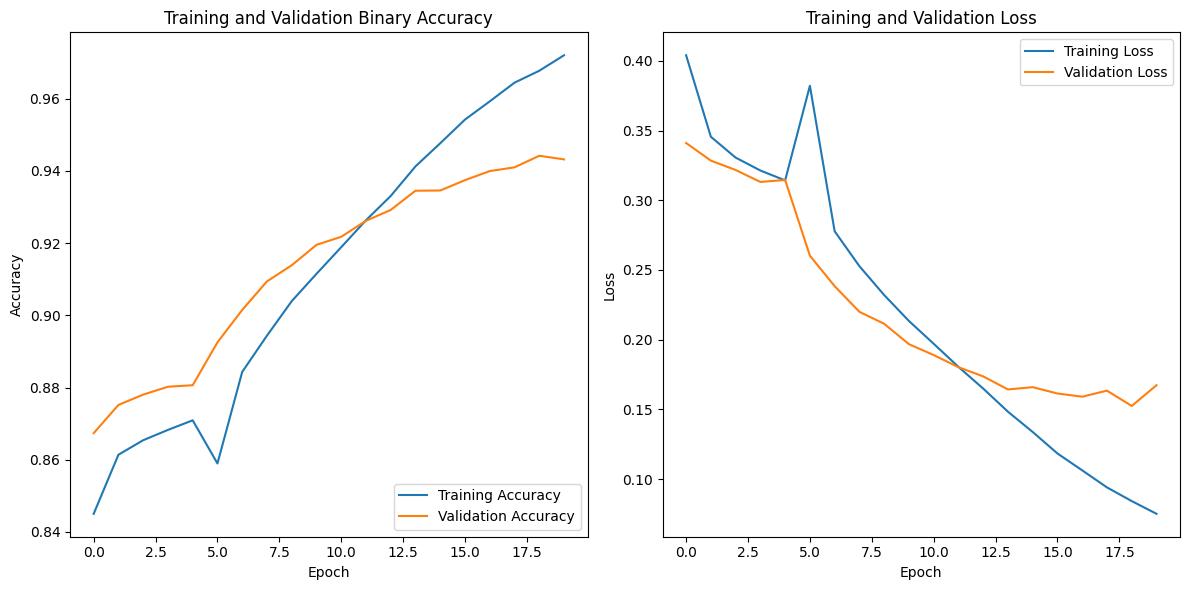

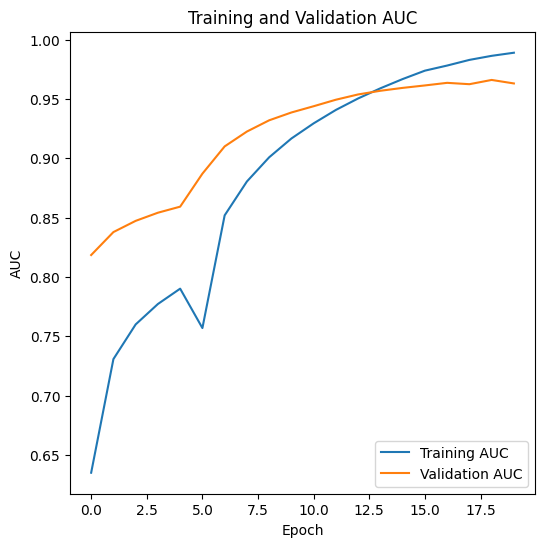


--- Evaluation and Plotting Complete ---


In [ ]:
# Load the Best Weights 
print(f"Loading best weights from {checkpoint_filepath}...")
model.load_weights(checkpoint_filepath)

# Evaluate on the Test Set (Using test_generator_custom)
print("\n--- Evaluating Model on Test Set ---")

results = model.evaluate(
    test_generator_custom,
    steps=len(test_generator_custom)
)

print("\n--- Test Set Performance ---")
# Metrics order matches the compile step: Loss, binary_accuracy, auc
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Binary Accuracy: {results[1]:.4f}")
print(f"Test AUC: {results[2]:.4f}")


# Combine history from both phases
history = {
    key: history_phase1.history[key] + history_phase2.history[key]
    for key in history_phase1.history.keys()
}

acc = history['binary_accuracy']
val_acc = history['val_binary_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs_range = range(len(acc))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Binary Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Plot AUC
auc = history['auc']
val_auc = history['val_auc']
plt.figure(figsize=(6, 6))
plt.plot(epochs_range, auc, label='Training AUC')
plt.plot(epochs_range, val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.show()

print("\n--- Evaluation and Plotting Complete ---")


--- Generating predictions for Classification Report ---
235/235 ━━━━━━━━━━━━━━━━━━━━ 156s 616ms/step
Extracting true labels from the test generator...
  Processed batch 50/235
  Processed batch 100/235
  Processed batch 150/235
  Processed batch 200/235
Finished extracting labels. Shape: (7520, 8)
Shape of y_true (true labels): (7520, 8)
Shape of y_pred_binary (predictions): (7520, 8)

--- Classification Report (Per Class) ---
              precision    recall  f1-score   support

      Normal       0.78      0.86      0.82      1857
    Diabetes       0.84      0.71      0.77      1756
    Glaucoma       0.81      0.85      0.83      1139
    Cataract       0.91      0.90      0.91       928
         AMD       0.86      0.85      0.86       612
Hypertension       0.85      0.84      0.85       600
      Myopia       0.89      0.88      0.88       650
       Other       0.76      0.57      0.65      1082

   micro avg       0.83      0.79      0.81      8624
   macro avg       0.84  

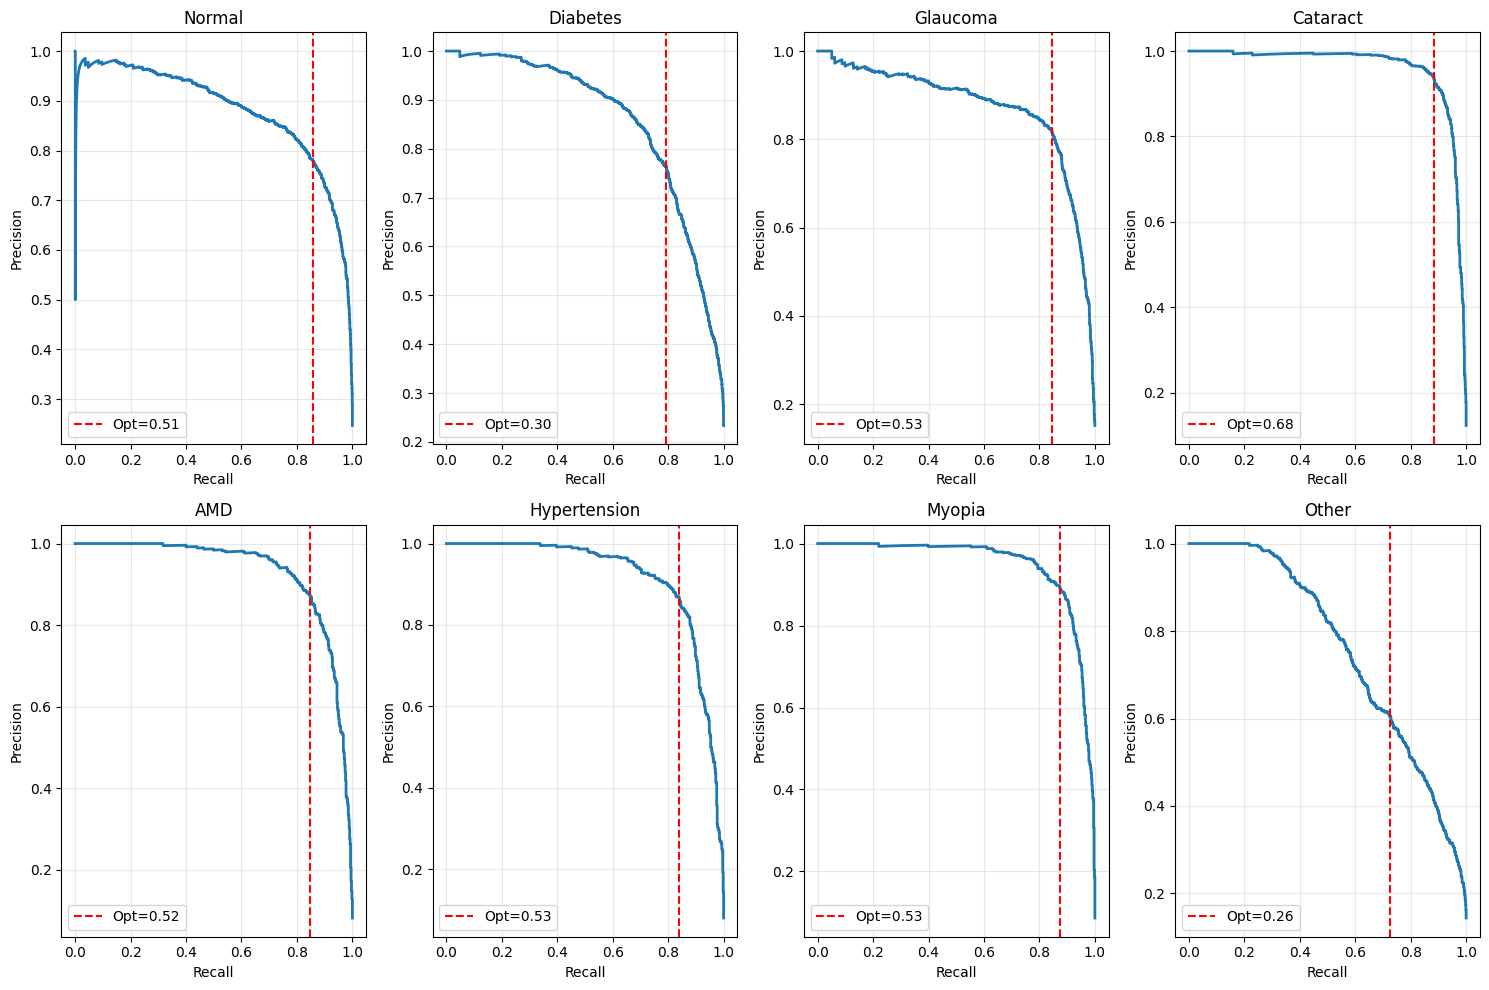


--- Optimal Thresholds ---
Normal         : 0.514
Diabetes       : 0.300
Glaucoma       : 0.531
Cataract       : 0.682
AMD            : 0.517
Hypertension   : 0.533
Myopia         : 0.529
Other          : 0.256

--- Results with Custom Thresholds ---
              precision    recall  f1-score   support

      Normal       0.78      0.86      0.82      1857
    Diabetes       0.76      0.79      0.78      1756
    Glaucoma       0.82      0.84      0.83      1139
    Cataract       0.94      0.88      0.91       928
         AMD       0.88      0.85      0.86       612
Hypertension       0.87      0.84      0.85       600
      Myopia       0.90      0.87      0.88       650
       Other       0.61      0.72      0.66      1082

   micro avg       0.79      0.83      0.81      8624
   macro avg       0.82      0.83      0.83      8624
weighted avg       0.80      0.83      0.81      8624
 samples avg       0.82      0.85      0.82      8624


--- Comparison: Standard 0.5 vs Custom Thr

In [ ]:

import numpy as np
from sklearn.metrics import classification_report, precision_recall_curve
import matplotlib.pyplot as plt

# --- 1. Get Predictions from the Test Set ---
print("\n--- Generating predictions for Classification Report ---")




# Predict probabilities
y_pred_proba = model.predict(
    test_generator_custom,
    steps=len(test_generator_custom), 
    verbose=1
)

#  Apply Threshold to get Binary Predictions 
threshold = 0.5
y_pred_binary = (y_pred_proba >= threshold).astype(int)

# Get True Labels from the Custom Generator 
print("Extracting true labels from the test generator...")
y_true = []
num_test_batches = len(test_generator_custom)

for i in range(num_test_batches):
    
   try:
        _, labels_batch = test_generator_custom[i]
        y_true.extend(labels_batch) 
   except Exception as e:
        print(f"Error getting batch {i}: {e}")
        break
   if (i + 1) % 50 == 0: # Print progress
        print(f"  Processed batch {i+1}/{num_test_batches}")

# Convert list of label arrays/lists into a single NumPy array
y_true = np.array(y_true)

print(f"Finished extracting labels. Shape: {y_true.shape}")

# Ensure Shapes Match 
print(f"Shape of y_true (true labels): {y_true.shape}")
print(f"Shape of y_pred_binary (predictions): {y_pred_binary.shape}")


# Slice the predictions array to match the number of true labels collected.
if y_true.shape[0] != y_pred_binary.shape[0]:
    print(f"Warning: Mismatch in number of samples. Adjusting predictions ({y_pred_binary.shape[0]}) to match true labels ({y_true.shape[0]}).")
    min_samples = min(y_true.shape[0], y_pred_binary.shape[0])
    y_true = y_true[:min_samples]
    y_pred_binary = y_pred_binary[:min_samples]
    y_pred_proba = y_pred_proba[:min_samples]
    print(f"Adjusted shapes: y_true={y_true.shape}, y_pred_binary={y_pred_binary.shape}")

# Generate and Print the Classification Report
# Define the names for your 8 classes in the correct order: [N, D, G, C, A, H, M, O]
class_names = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Other']

print("\n--- Classification Report (Per Class) ---")
# Use zero_division=0 to prevent warnings if a class has no predictions or no true samples in the test set
report = classification_report(y_true, y_pred_binary, target_names=class_names, zero_division=0)
print(report)

print("\n--- Overall Sample-Based Metrics (Micro/Macro Averages) ---")
try:
    report_dict = classification_report(y_true, y_pred_binary, target_names=class_names, output_dict=True, zero_division=0)
    print(f"Macro Avg F1-Score: {report_dict['macro avg']['f1-score']:.4f}")
    print(f"Weighted Avg F1-Score: {report_dict['weighted avg']['f1-score']:.4f}")
    print(f"Micro Avg F1-Score: {report_dict['micro avg']['f1-score']:.4f}") 
except Exception as e:
    print(f"Could not calculate dictionary report: {e}")

# OPTIMAL THRESHOLD RECOMMENDATION 
print("\n--- Finding Optimal Thresholds Per Class ---")

optimal_thresholds = {}

plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_names):
    precision, recall, thresholds = precision_recall_curve(
        y_true[:, i], 
        y_pred_proba[:, i]
    )
    
    # Find threshold that maximizes F1-score
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    optimal_thresholds[class_name] = best_threshold
    
    # Plot
    plt.subplot(2, 4, i+1)
    plt.plot(recall, precision, linewidth=2)
    plt.axvline(recall[best_idx], color='r', linestyle='--', 
                label=f'Opt={best_threshold:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{class_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print optimal thresholds
print("\n--- Optimal Thresholds ---")
for name, thresh in optimal_thresholds.items():
    print(f"{name:15s}: {thresh:.3f}")

# Apply custom thresholds
threshold_array = np.array([optimal_thresholds[name] for name in class_names])
y_pred_custom = (y_pred_proba >= threshold_array).astype(int)

# Evaluate with custom thresholds
print("\n--- Results with Custom Thresholds ---")
report_custom = classification_report(y_true, y_pred_custom, target_names=class_names, zero_division=0)
print(report_custom)

# Comparison
print("\n--- Comparison: Standard 0.5 vs Custom Thresholds ---")
try:
    report_dict_custom = classification_report(y_true, y_pred_custom, target_names=class_names, output_dict=True, zero_division=0)
    print(f"Standard (0.5) - Macro F1: {report_dict['macro avg']['f1-score']:.4f}")
    print(f"Custom Thresh  - Macro F1: {report_dict_custom['macro avg']['f1-score']:.4f}")
    improvement = (report_dict_custom['macro avg']['f1-score'] - report_dict['macro avg']['f1-score']) * 100
    print(f"Improvement: {improvement:+.2f}%")
except Exception as e:
    print(f"Could not calculate comparison: {e}")

# Multi-disease analysis
multi_disease_true = (y_true.sum(axis=1) > 1).sum()
multi_disease_pred = (y_pred_custom.sum(axis=1) > 1).sum()
print(f"\nMulti-disease samples (true): {multi_disease_true}")
print(f"Multi-disease samples (pred): {multi_disease_pred}")



**Classification Model Performance Summary**

This output summarizes the performance of the trained DenseNet-121 model on the unseen Test Set, evaluated via a multi-label classification report.
Prediction Process: The model successfully generated predictions for $7,520$ test images, processing $235$ batches using the test_generator_custom.

**Overall Performance**: The model shows strong generalized performance, achieving an impressive:Weighted Average F1-Score of $\mathbf{0.81}$Micro Average F1-Score of $\mathbf{0.81}
$Note: The micro-average F1-score is close to the reported Micro Avg Precision (0.83) and Micro Avg Recall (0.79).

**Best Performing Classes** : The model excelled at identifying Cataract ($\mathbf{0.91}$ F1-Score) and Myopia ($\mathbf{0.88}$ F1-Score), indicating high precision and recall for these conditions.

**Lowest Performing Class**: The lowest performance was observed for Other diseases/abnormalities ($\mathbf{0.65}$ F1-Score), primarily due to a lower recall ($\mathbf{0.57}$). This suggests the model often fails to detect these diverse or less-defined conditions when they are present

**Performance Summary: Custom Threshold Optimization**

This output summarizes the performance improvement achieved by using class-specific optimal probability thresholds instead of the default $0.5$ threshold for multi-label classification.

**Optimal Thresholds**: A unique probability threshold was calculated for each of the $8$ disease classes (e.g., $0.514$ for Normal, $\mathbf{0.300}$ for Diabetes, $\mathbf{0.256}$ for Other). The lowest threshold ($\mathbf{0.256}$) was applied to the 'Other' class, reflecting its lower prediction confidence.

**Performance Improvement**: Utilizing these custom thresholds led to a small but positive gain

**Key Changes in Classes**:

The Diabetes class saw the most notable change in the balance between precision and recall, with its F1-Score remaining strong at $\mathbf{0.78}$.

The 'Other' class, despite having a low threshold, significantly improved its recall ($\mathbf{0.72}$) while maintaining an F1-Score of $\mathbf{0.66}$.

**Multi-Disease Prediction**: The model predicted $\mathbf{1,469}$ samples as having multiple diseases, significantly more than the $\mathbf{1,018}$ true multi-disease samples, suggesting a tendency toward more aggressive (sensitive) multi-label prediction with the optimized thresholds.

In [ ]:
# Save the entire model 
model.save('/kaggle/working/my_ocular_model_densenet121.keras')

print("Model saved successfully as 'my_ocular_model_densenet121.keras'")

Model saved successfully as 'my_ocular_model_densenet121.keras'
